# Using Neural Networks on MNIST Data

In [6]:
import pandas as pd
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

## Reading the data

In [48]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [49]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [50]:
y_train[0]

5

## Visualizing images from our data

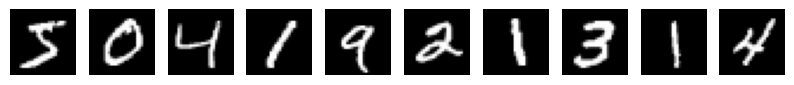

label for each of the above image: [5 0 4 1 9 2 1 3 1 4]


In [10]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## Normalizing our train and test data

In [52]:
# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

# # normalize inputs from 0-255 to 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

print('Training set', x_train.shape, y_train.shape)
print('Test set', x_test.shape, y_test.shape)

Training set (60000, 784) (60000,)
Test set (10000, 784) (10000,)


## One-Hot Encoding on the target variables

In [53]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test_cat=to_categorical(y_test,num_classes)

In [13]:
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Defining the Sequential Model

In [14]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

image_size=28*28

# create model
model = Sequential()

model.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,))) ###Multiple Dense units with Relu activation
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax is used

In [15]:
# Compile model
#RMS_prop=optimizers.RMSprop()   ## we can similarly use different optimizers like RMSprop, Adagrad and SGD
adam = optimizers.Adam(lr=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy

In [16]:
## Looking into our base model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 223,978
Trainable params: 223,978
Non-trainable params: 0
_________________________________________________________________


In [17]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [18]:
# Fit the model
history=model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=2,callbacks=callbacks)

Epoch 1/10

Epoch 1: saving model to model_weights.h5
375/375 - 5s - loss: 0.3463 - accuracy: 0.8974 - val_loss: 0.1584 - val_accuracy: 0.9541 - lr: 0.0010 - 5s/epoch - 13ms/step
Epoch 2/10

Epoch 2: saving model to model_weights.h5
375/375 - 4s - loss: 0.1251 - accuracy: 0.9632 - val_loss: 0.1196 - val_accuracy: 0.9634 - lr: 0.0010 - 4s/epoch - 11ms/step
Epoch 3/10

Epoch 3: saving model to model_weights.h5
375/375 - 3s - loss: 0.0843 - accuracy: 0.9750 - val_loss: 0.1091 - val_accuracy: 0.9707 - lr: 0.0010 - 3s/epoch - 7ms/step
Epoch 4/10

Epoch 4: saving model to model_weights.h5
375/375 - 3s - loss: 0.0589 - accuracy: 0.9829 - val_loss: 0.0998 - val_accuracy: 0.9715 - lr: 0.0010 - 3s/epoch - 7ms/step
Epoch 5/10

Epoch 5: saving model to model_weights.h5
375/375 - 3s - loss: 0.0496 - accuracy: 0.9849 - val_loss: 0.0981 - val_accuracy: 0.9729 - lr: 0.0010 - 3s/epoch - 8ms/step
Epoch 6/10

Epoch 6: saving model to model_weights.h5
375/375 - 4s - loss: 0.0343 - accuracy: 0.9896 - val_l

In [19]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline
# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [20]:
torch.cuda.is_available()

False

In [21]:
# predicting the model on test data
y_pred=model.predict(x_test)


313/313 [==============================] - 1s 2ms/step


In [22]:
y_pred[0]

array([2.8650570e-07, 4.8834405e-08, 2.0040674e-05, 6.8330386e-04,
       7.8652501e-12, 1.2199088e-07, 5.7987382e-13, 9.9928927e-01,
       5.7368347e-06, 1.2054119e-06], dtype=float32)

In [23]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

In [24]:
y_pred_final[0]


7

## Generating the Classification Report

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Confusion Matrix

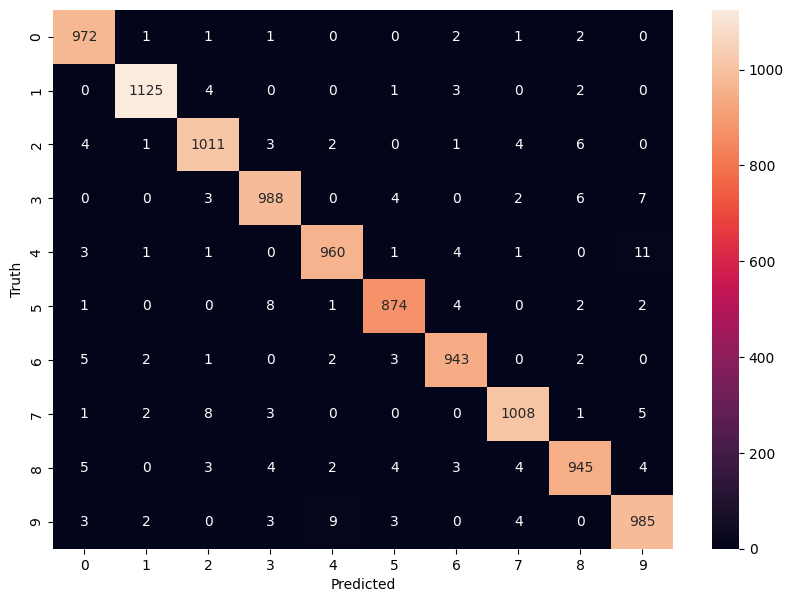

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_final)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Misclassified images

In [27]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, y_pred_final):
    if label != predict:
        misclassified_images.append(index)
    index +=1
print(misclassified_images)
print(len(misclassified_images))

[8, 247, 321, 445, 447, 495, 582, 619, 659, 684, 707, 720, 740, 883, 947, 951, 956, 1003, 1014, 1039, 1112, 1156, 1178, 1182, 1226, 1232, 1242, 1247, 1260, 1289, 1299, 1319, 1378, 1393, 1500, 1522, 1530, 1549, 1569, 1609, 1611, 1681, 1790, 1828, 1901, 1941, 1984, 2004, 2016, 2024, 2053, 2070, 2098, 2109, 2118, 2135, 2182, 2266, 2272, 2293, 2369, 2387, 2408, 2488, 2597, 2648, 2654, 2720, 2810, 2863, 2877, 2896, 2915, 2921, 2927, 2939, 3060, 3073, 3330, 3422, 3451, 3474, 3490, 3503, 3520, 3533, 3559, 3567, 3597, 3780, 3811, 3869, 3906, 3926, 3941, 3943, 3985, 4065, 4075, 4163, 4176, 4207, 4224, 4248, 4289, 4294, 4350, 4360, 4369, 4497, 4536, 4740, 4761, 4807, 4814, 4823, 4860, 4876, 4880, 4956, 5176, 5331, 5495, 5600, 5642, 5734, 5749, 5887, 5888, 5936, 5937, 5955, 5973, 5982, 5997, 6011, 6023, 6045, 6059, 6421, 6555, 6558, 6560, 6571, 6572, 6576, 6597, 6603, 6641, 6651, 6755, 6783, 6847, 6945, 7216, 7434, 7921, 7945, 8094, 8243, 8246, 8277, 8325, 8339, 8408, 8456, 8522, 8527, 9009, 9015

## Predicting the output

1/1 [==============================] - 0s 25ms/step
Was predicted  0
Was labeled  6
Predicted Probabilities:  [[9.7390819e-01 3.0022591e-07 4.4620916e-07 1.8452879e-07 3.1070638e-07
  2.4843635e-04 2.5792085e-02 2.9765894e-07 4.9222843e-05 4.1708242e-07]]


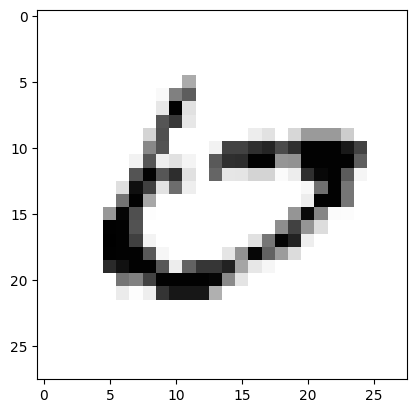

In [28]:
image_index = 445
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(-1, 784))
print("Was predicted ",pred.argmax())
print("Was labeled ",y_test[image_index])
print("Predicted Probabilities: ",pred)

## Accuracy Curve

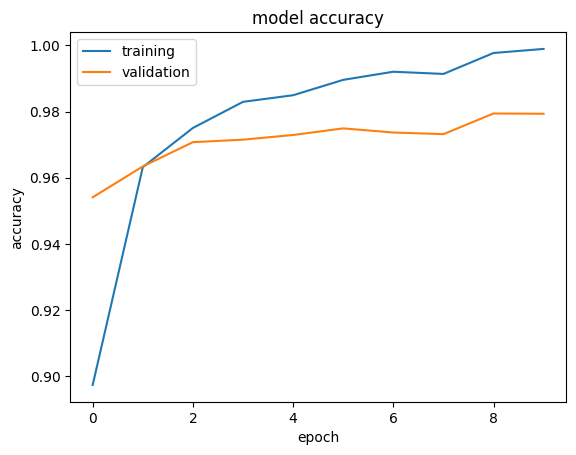

In [29]:
loss, accuracy  = model.evaluate(x_test, y_test_cat, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

## Model 2

In our first model we have implemented a simple neural network on MNIST data.

Now we will try to observe how Batch Normalization and Dropout can be used in our model.

## Using Batch Normalization and Dropout

In [30]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers
from keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

image_size=28*28

# create model
model_1 = Sequential()

model_1.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,))) ###Multiple Dense units with Relu activation
model_1.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_1.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))## Weight Initialization
model_1.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_1.add(Dropout(0.5))
model_1.add(BatchNormalization())
model_1.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax is used

In [31]:
# Compile model
adam = optimizers.Adam(lr=1e-3)
model_1.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy

In [32]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                      

In [33]:
checkpoint = ModelCheckpoint("model_weights_1.h5",monitor='val_accuracy',
                            save_weights_only=True, model='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [46]:
y_train.shape

(60000, 10)

In [35]:
# Fit the model
history=model_1.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=2, callbacks=callbacks)

Epoch 1/10

Epoch 1: saving model to model_weights_1.h5
375/375 - 6s - loss: 0.8423 - accuracy: 0.7640 - val_loss: 0.2262 - val_accuracy: 0.9457 - lr: 0.0010 - 6s/epoch - 15ms/step
Epoch 2/10

Epoch 2: saving model to model_weights_1.h5
375/375 - 4s - loss: 0.3330 - accuracy: 0.9182 - val_loss: 0.1523 - val_accuracy: 0.9570 - lr: 0.0010 - 4s/epoch - 10ms/step
Epoch 3/10

Epoch 3: saving model to model_weights_1.h5
375/375 - 6s - loss: 0.2281 - accuracy: 0.9423 - val_loss: 0.1148 - val_accuracy: 0.9700 - lr: 0.0010 - 6s/epoch - 15ms/step
Epoch 4/10

Epoch 4: saving model to model_weights_1.h5
375/375 - 7s - loss: 0.1772 - accuracy: 0.9540 - val_loss: 0.1092 - val_accuracy: 0.9683 - lr: 0.0010 - 7s/epoch - 19ms/step
Epoch 5/10

Epoch 5: saving model to model_weights_1.h5
375/375 - 6s - loss: 0.1454 - accuracy: 0.9614 - val_loss: 0.1143 - val_accuracy: 0.9707 - lr: 0.0010 - 6s/epoch - 16ms/step
Epoch 6/10

Epoch 6: saving model to model_weights_1.h5
375/375 - 5s - loss: 0.1231 - accuracy:

In [36]:
y_pred_1=model_1.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [37]:
y_pred_final_1=[]
for i in y_pred_1:
  y_pred_final_1.append(np.argmax(i))

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final_1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [39]:
from sklearn.metrics import confusion_matrix
cm_1=confusion_matrix(y_test,y_pred_final_1)

Text(95.72222222222221, 0.5, 'Truth')

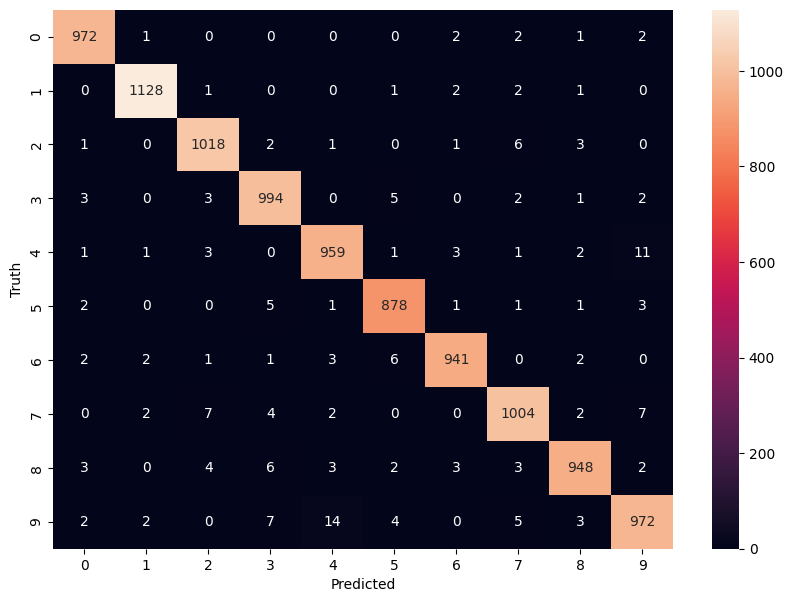

In [40]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, y_pred_final_1):
    if label != predict:
        misclassified_images.append(index)
    index +=1
print(misclassified_images)
print(len(misclassified_images))

[247, 321, 445, 447, 495, 582, 684, 691, 707, 740, 813, 877, 924, 938, 951, 965, 1014, 1039, 1044, 1112, 1182, 1192, 1226, 1232, 1242, 1247, 1289, 1299, 1319, 1325, 1328, 1393, 1395, 1494, 1500, 1522, 1530, 1549, 1553, 1678, 1681, 1709, 1751, 1754, 1790, 1828, 1878, 1901, 1941, 1952, 1955, 1987, 2004, 2018, 2024, 2035, 2053, 2070, 2109, 2130, 2135, 2182, 2272, 2325, 2369, 2387, 2414, 2422, 2488, 2607, 2648, 2654, 2720, 2743, 2810, 2877, 2896, 2921, 2939, 2953, 3060, 3117, 3284, 3289, 3422, 3475, 3490, 3503, 3520, 3533, 3558, 3559, 3597, 3674, 3681, 3811, 3853, 3869, 3941, 3943, 3985, 4027, 4065, 4075, 4078, 4154, 4163, 4176, 4199, 4201, 4205, 4224, 4248, 4255, 4289, 4294, 4369, 4382, 4487, 4536, 4551, 4601, 4731, 4740, 4751, 4761, 4807, 4823, 4833, 4860, 4879, 4880, 4956, 4966, 5331, 5457, 5600, 5634, 5642, 5734, 5757, 5887, 5936, 5937, 5973, 6011, 6045, 6059, 6071, 6166, 6168, 6173, 6505, 6555, 6558, 6597, 6632, 6651, 6755, 6783, 6817, 6847, 7216, 7434, 7921, 8277, 8325, 8527, 9009, 9

1/1 [==============================] - 0s 26ms/step
Was predicted  4
Was labeled  4
Predicted Probabilities:  [[2.5980669e-04 4.6785394e-04 3.2213171e-05 4.9388671e-04 9.4694501e-01
  2.8602622e-04 7.3364715e-04 1.5980420e-04 2.5738889e-04 5.0364345e-02]]


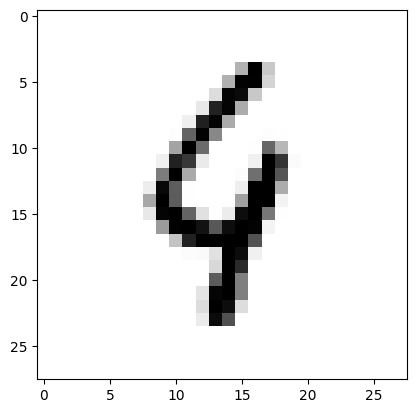

In [42]:
image_index = 115
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model_1.predict(x_test[image_index].reshape(-1, 784))
print("Was predicted ",pred.argmax())
print("Was labeled ",y_test[image_index])
print("Predicted Probabilities: ",pred)

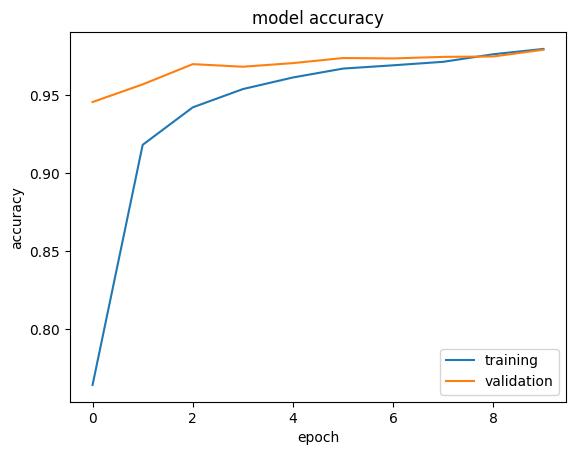

In [43]:
loss, accuracy  = model_1.evaluate(x_test, y_test_cat, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

# Summary

1. We can observe from our both models that model with batch normalization and dropout is performing similar in terms of misclassifications.
2. However, the accuracy curve for train and validation shows that our model with dropout and batch normalization is much less an overfit.
3. Thus we achieve higher accuracy score of 97% to 98%.